<a href="https://colab.research.google.com/github/aweeraman/colaboratory/blob/master/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch
!pip install numpy

In [0]:
import torch

In [4]:
# Scalar
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

In [5]:
# Vector
torch.Tensor([1, 2, 3])

tensor([1., 2., 3.])

In [6]:
# Matrix
X = torch.Tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
X

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [0]:
from torch.autograd import Variable

In [0]:
X = torch.ones(1) * 10

In [9]:
X = Variable(X, requires_grad=True)
X

tensor([10.], requires_grad=True)

In [10]:
# y = 5 * X
y = (5 * X).sum()
y

tensor(50., grad_fn=<SumBackward0>)

In [0]:
# dy / dx = 5
# back propagate to compute gradients of all variables wrt y
y.backward()

In [12]:
# Get the gradient
X.grad

tensor([5.])

In [13]:
X.detach().numpy()

array([10.], dtype=float32)

In [0]:
import numpy as np

In [15]:
arr = np.random.randn(5)
arr

array([ 0.78948256, -0.09664776, -0.95691501, -1.57345919, -0.43427378])

In [16]:
x = torch.from_numpy(arr)
x

tensor([ 0.7895, -0.0966, -0.9569, -1.5735, -0.4343], dtype=torch.float64)

In [17]:
# indexing similar to Python and numpy
x[:-2]

tensor([ 0.7895, -0.0966, -0.9569], dtype=torch.float64)

In [0]:
np.random.seed(42)
centers = np.array([[0,0]] * 100 + [[1, 1]] * 100)

x = np.random.normal(0, 0.2, np.shape(centers)) + centers
y = np.array([[0]] * 100 + [[1]] * 100)

x = Variable(torch.from_numpy(x).type(torch.FloatTensor), requires_grad=False)
y = Variable(torch.from_numpy(y).type(torch.FloatTensor), requires_grad=False)

In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, '$X2$')

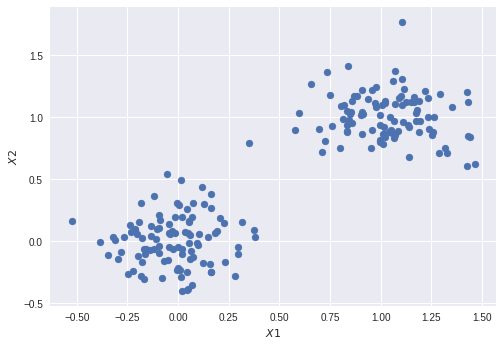

In [136]:
plt.scatter(data[:,0], data[:,1], color=None)
plt.xlabel("$X1$")
plt.ylabel("$X2$")

In [0]:
# Instantiate Model, Optimizer and Loss Function
model = torch.nn.Sequential(
  torch.nn.Linear(2, 1)
)

optim = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_function = torch.nn.CrossEntropyLoss()

nb_epochs = 200
losses = []
for epoch in range(nb_epochs):
  
  # Run forward propagation
  outputs = model(x)
  
  # Get Loss value
  loss = loss_function(outputs, y)
  
  # Zero out the gradient
  optim.zero_grad()
  
  # Do backward prop on loss wrt parameters
  loss.backward()
  
  # Update the gradients
  optim.step()